## 1.- Importar las librerias

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
!pip install graphviz

## 2.- Carga de la base de datos

In [2]:
carsCSV = pd.read_csv("cars.csv")
carsCSV.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## 3.- Información y descripción de los datos

In [3]:
carsCSV.info()
carsCSV.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,3,2,small,high,unacc
freq,432,432,432,576,576,576,1210


## 4.- Limpieza de datos

### 4.1.- Codificación de datos

In [4]:
carsCSV["doors"] = np.where(carsCSV["doors"] == "5more", 5, carsCSV["doors"])
carsCSV["persons"] = np.where(carsCSV["persons"] == "more", 5, carsCSV["persons"])
carsCSV.info()
carsCSV.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### 4.2.- Limpieza de datos

In [5]:
carsCSV.dropna()
carsCSV.info()
carsCSV.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## 5.- Árboles de decisión

In [6]:
cod = {"low":1, "med":2, "high":3, "vhigh":4} #para buying, maint y safety
lug_boot_cod = {"small":1, "med":2, "big":3} #para lug_boot
class_cod = {"unacc":1, "acc":2, "good":3, "vgood":4} #para class

### MAPEAMOS LAS CLASES
carsCSV["buying"] = carsCSV["buying"].map(cod)
carsCSV["maint"] = carsCSV["maint"].map(cod)
carsCSV["safety"] = carsCSV["safety"].map(cod)
carsCSV["lug_boot"] = carsCSV["lug_boot"].map(lug_boot_cod)
carsCSV["class"] = carsCSV["class"].map(class_cod)

### 5.1 Separación de datos

In [7]:
X_values = carsCSV.iloc[:,1:]
Y_values = carsCSV["class"]
x_train, x_test, y_train, y_test = train_test_split(X_values, Y_values, test_size=0.2, random_state=0)
x_train.head()

,maint,doors,persons,lug_boot,safety,class
1649,1,3,2,1,3,1
1465,3,4,2,3,2,1
361,1,3,4,1,2,1
315,2,5,5,1,1,1
1372,4,4,5,2,2,2


In [8]:
y_train.head()

1649    1
1465    1
361     1
315     1
1372    2
Name: class, dtype: int64

In [9]:
modelo = tree.DecisionTreeClassifier()
modelo = modelo.fit(x_train, y_train)

### 5.2.- Visualización del árbol

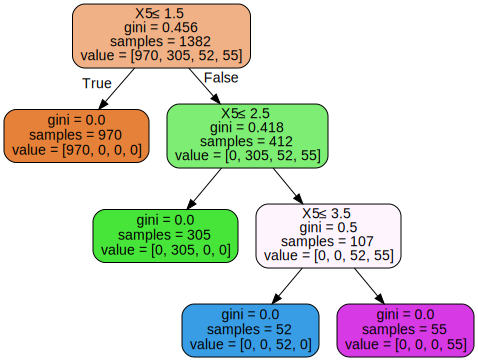

In [12]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(modelo, out_file="cars.dot", filled=True, rounded=True, special_characters=True)

with open("cars.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)